In [1]:
# Kutubxonalarni chaqirib olish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Iris flower datasetini yuklash
california = datasets.fetch_california_housing(as_frame=True)
df = california.frame
df.head(10) # ixtiyoriy 10 ta datasetni ko'rish

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [2]:
# average rooms
Rm_list = df['AveRooms'].values.tolist()
Rm_array = df['AveRooms'].values
Rm_frame = df['AveRooms']

# average bedrooms
Bd_list = df['AveBedrms'].values.tolist()
Bd_array = df['AveBedrms'].values
Bd_frame = df['AveBedrms']


## Covariance ni hisoblash

In [3]:
def cal_covv(Rm_list, Bd_list):
    if len(Rm_list) != len(Bd_list):
        raise ValueError("X and Y should have same length")

    n = len(Rm_list) 
    Rm_mean = sum(Rm_list)/n
    Bd_mean = sum(Bd_list)/n

    covariance = sum((Rm_list[i] - Rm_mean)*(Bd_list[i] - Bd_mean) for i in range(n))/n

    return covariance

cal_covv(Rm_list, Bd_list)




0.9938196481692929

In [4]:
# numpy da covariance ni hisoblash

covv = np.cov(Rm_list, Bd_list)
covv[0,1]


np.float64(0.9938678006790173)

In [5]:
# pandas yordamida covariance ni hisoblash

df['AveRooms'].cov(df['AveBedrms'])

np.float64(0.9938678006790173)

## Correlation

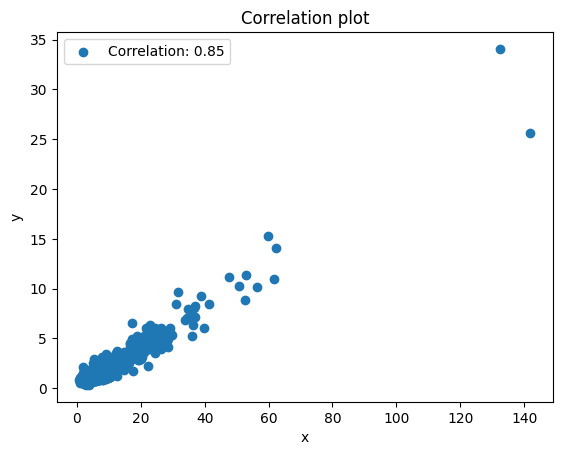

In [6]:
def cal_correlation(x, y):
    if len(x) != len(y):
        raise ValueError("X and Y must have same length")
    
    n = len(x)
    mean_X = sum(x)/n
    mean_Y = sum(y)/n

    # covariance ni topamiz
    cov = sum((x[i] - mean_X)*(y[i] - mean_Y) for i in range(n))/n

    # SD ni topamiz
    std_x = (sum((xi - mean_X) ** 2 for xi in x) / n) ** 0.5
    std_y = (sum((yi - mean_Y) ** 2 for yi in y) / n) ** 0.5

    correlation = cov/(std_x * std_y)

    return correlation

cal_correlation(Rm_list, Bd_list)

plt.scatter(Rm_list, Bd_list, label=f'Correlation: {cal_correlation(Rm_list, Bd_list):.2f}')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Correlation plot")
plt.legend()
plt.show()


In [7]:
# numpy da correlationni topish

corr = np.corrcoef(Rm_list, Bd_list)

corr[0,1]

np.float64(0.8476213257130447)

In [8]:
# pandas da correlationni topish

df['AveRooms'].corr(df['AveBedrms'])

# matrix
df[['AveRooms', 'AveBedrms']].corr()

,AveRooms,AveBedrms
AveRooms,1.000000,0.847621
AveBedrms,0.847621,1.000000


## PDF ni topish

PDF values for Average Rooms data:
[0.13234029 0.15284664 0.0826995  ... 0.16058638 0.16111237 0.16084313]


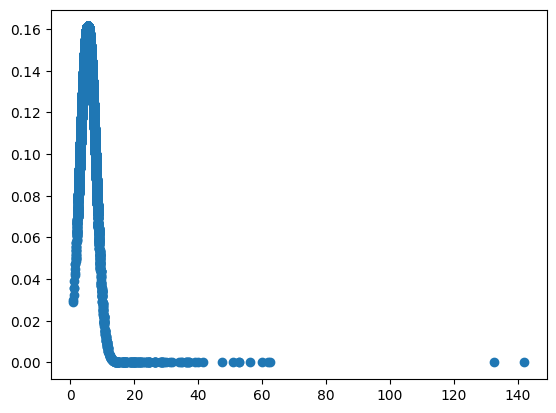

In [9]:
def cal_pdf(data):
    mean = np.mean(data) #mean ni numpy yordamida topish
    std = np.std(data, ddof=1) #SD ni topamiz
    coeff = 1 / (std * np.sqrt(2 * np.pi)) # koffitsientni topamiz

    #exponent ni topamiz
    exponent = np.exp(-((data - mean) ** 2 / (2 * std ** 2)))

    return coeff * exponent

pdf_values = cal_pdf(Rm_array)

print("PDF values for Average Rooms data:")
print(pdf_values)

plt.scatter(Rm_array, pdf_values)


## Normalizatsiya (Scaling)
# Min-Max scaling

In [10]:
def cal_minmax(array):
    min_val = np.min(array)
    print(min_val)

    max_val = np.max(array)
    print(max_val)
    
    return (array - min_val) / (max_val - min_val)



cal_minmax(Bd_array)


0.3333333333333333
34.06666666666667


array([0.02046866, 0.01892926, 0.02194011, ..., 0.0233229 , 0.02485928,
       0.02457305], shape=(20640,))